In [1]:
# Import libraries / modules
import numpy as np
from itertools import product
from collections import Counter
from matplotlib import pyplot as plt
import sparse
from fractions import Fraction
import contfrac
import random as rm

In [2]:
class QuantumCircuit:
    """
    A class used to simulate a quantum computer
    
    ...
    
    Attributes:
    ----------
    qubits : int
        Optional -> Default is 3
        DESCRIPTION - The number of qubits in the quantum circuit
    psi : list
        Optional -> Default is []
        DESCRIPTION - The quantum register
    C : int
        Optional -> Default is 0
        DESCRIPTION - Composite integer to be factorised
    a : int
        Optional -> Default is 0
        DESCRIPTION - A random integer used for Shor's algorithm
    L : int
        Optional -> Default is 0
        DESCRIPTION - Number of qubits in the x-register of Shor's algorithm
    M : int
        Optional -> Default is 0
        DESCRIPTION - Number of qubits in the f-register of Shor's algorithm
    
    Methods:
    ----------
    getQubits():
        DESCRIPTION - Get the qubits of the circuit
    setQubits(new_qubits):
        DESCRIPTION - Set the value of the qubits
    register():
        DESCRIPTION - Create quantum register for n qubits
    getBasisStates():
        DESCRIPTION - Calculate and store all possible basis states in a list
    measure():
        DESCRIPTION - Take a single measurement
    takeMeasurements(measurements=100):
        DESCRIPTION - Take many measurements
    hadamardGate(qubit):
        DESCRIPTION - Construct a Hadamard gate to operate on a specified qubit
    applyHadamardGate(qubits):
        DESCRIPTION - Apply a Hadamard gate to the specified qubits
    phaseShiftGate(qubit, theta):
        DESCRIPTION - Construct a phase shift gate to operate on a specific qubit with angle theta
    applyPhaseShiftGate(qubits, theta):
        DESCRIPTION - Apply a phase shift gate to the specified qubits at angle theta
    notGate(qubit):
        DESCRIPTION - Construct a not gate to operate on a specified qubit
    applyNotGate(qubit):
        DESCRIPTION - Apply not gate to the specified qubit
    rotationGate(qubit, theta):
        DESCRIPTION - Construct a rotation gate to act on a specified qubit at angle theta
    applyRotationGate(qubits, theta):
        DESCRIPTION - Apply a rotation gate to the specified qubits at angle theta
    cnotGate(control, target):
        DESCRIPTION - Construct a controlled not gate
    applyCnotGate(control, target):
        DESCRIPTION - Apply a controlled not gate
    ctrlPhaseShiftGate(control, target, theta):
        DESCRIPTION - Construct a controlled phase shift gate
    applyCtrlPhaseShiftGate(control, target, theta):
        DESCRIPTION - Apply a controlled phase shift gate
    oracle(question):
        DESCRIPTION - Construct an oracle matrix for a specified question
    applyOracle(question):
        DESCRIPTION - Apply an oracle matrix for a specified question
    JOperator():
        DESCRIPTION - Construct J operator matrix
    applyJOperator():
        DESCRIPTION - Apply J operator matrix
    groversAlgo(question):
        DESCRIPTION - Construct the circuit for Grover's algorithm based on a specific question
    applyGroversAlgo(question):
        DESCRIPTION - Apply Grover's algorithm and take measurements
    checkPowers(C):
        DESCRIPTION - Check if C is a power of a smaller integer
    aModCGate(control, a_n):
        DESCRIPTION - Create a controlled gate that will multiply the target qubits by a^n(mod C)
    IQFT():
        DESCRIPTION - Apply an Inverse Quantum Fourier Transform to quantum circuit
    periodFinding(C, L, M, a):
        DESCRIPTION - Determine possible period values
    shorsAlgo(C):
        DESCRIPTION - Implement Shor's algorithm
    merminsDevice():
        DESCRIPTION - Simulate Mermims quantum device
    """
    
    def __init__(self, qubits=3, psi=[], C=0, a=0, L=0, M=0):
        """
        Parameters
        ----------
        qubits : TYPE, optional - Integer
            DESCRIPTION - The default is 3. Number of qubits.
        psi : TYPE, optional - List
            DESCRIPTION - The default is []. Quantum state column vector.
        C : TYPE, optional - Integer
            DESCRIPTION - The default is 0. Composite number
        a : TYPE, optional - Integer
            DESCRIPTION - The default is 0. Random number between 2 and C
        L : TYPE, optional - Integer
            DESCRIPTION - The default is 0. Number of qubits in the x-register
        M : TYPE, optional - Integer
            DESCRIPTION - The default is 0. Number of qubits in the f-register
        Returns
        -------
        None.
        """
        # Initialise qubits list of orientations
        self.qubits = [0] * qubits
        # Determine the number of qubits
        self.N_qubits = qubits
        # If psi is not provided, create psi using qubit register
        if len(psi) == 0:
            self.psi = self.register()
        # Else use psi provided
        else:
            self.psi = psi
        # Store basis states as an instance variable
        self.basis_states = self.getBasisStates()
        # Assign global variables with default values of zero to be updated in Shor's algorithm
        # Composite integer
        self.C = C
        # Random number
        self.a = a
        # Number of qubits in x register
        self.L = L
        # Number of qubits in f register
        self.M = M
    
    def __str__(self):
        """
        Format the basis state of the qubits as a string
        
        ...
        
        Returns
        -------
        str
            DESCRIPTION - Basis state of qubits
        """
        # Return measurement value as a string
        return f'|{"".join([str(i) for i in self.qubits])}>'
    
    def getQubits(self):
        """
        Get the qubits of the circuit
        ...
        
        Returns
        -------
        TYPE - Object
            DESCRIPTION - New instance of QuantumCircuit class
        """
        return self.qubits
    
    def setQubits(self, new_qubits):
        """
        Replace the value of the current qubits with new qubits
        
        ...
        
        Parameters
        ----------
        new_qubits : TYPE: Int
            DESCRIPTION: New number of qubits

        Returns
        -------
        TYPE - Object
            DESCRIPTION - New instance of QuantumCircuit class
        """
        return QuantumCircuit(qubits=new_qubits)
    
    def register(self):
        """
        Create the quantum register for n qubits
        
        ...
        
        Returns
        -------
        psi : TYPE: 2D Numpy Array
            DESCRIPTION: Column vector storing quantum state of N-qubits
        """
        # Initialise empty list
        qubits_list = []
        # Define qubits states as sparse matrices
        q_up = sparse.COO.from_numpy(np.array([[1+0j],[0+0j]]))    # Spin up - |0>
        q_down = sparse.COO.from_numpy(np.array([[0+0j],[1+0j]]))  # Spin down - |1>
        
        # Create list of qubits states
        for qubit in self.qubits:
            if qubit == 0:
                qubits_list.append(q_up)
            else:
                qubits_list.append(q_down)

        # Initialise psi to equal the first qubit orientation
        psi = qubits_list[0]
        # Get combined Kronecker product of all qubits
        for i, qubit in enumerate(qubits_list):
            # Skip the first qubit (already accounted for above)
            if i < 1:
                continue
            psi = np.kron(psi, qubit)
        # Return as a sparse matrix
        return psi
    
    def getBasisStates(self):
        """
        Calculate and store all possible basis states in a list
        
        ...
        
        Returns
        -------
        TYPE: 2D List
            DESCRIPTION: List of all possible N qubit configurations
        """
        # Determine all possible basis states
        return list(product([0, 1], repeat=self.N_qubits))
    
    def measure(self):
        """
        Take a single measurement of the quantum register
        
        ...
        
        Returns
        -------
        TYPE: String
            DESCRIPTION: Qubit measurement
        """
        # Determine all possible basis states
        basis_states = self.basis_states
        # Generate random number between 0 and 1
        r = np.random.rand()
        # Reduce psi to 1-D list
        psi = self.psi.flatten()
        # Initialize q to zero
        q = 0
        # Iterate through each probability in psi
        for i, amp in enumerate(psi):
            # probability = |amplitude|**2
            prob = amp*amp.conjugate()
            # q = q + probability
            q += prob
            # If the probability is greater than the random number
            if r < q:
                # Take measurement
                return f'|{"".join(str(b) for b in basis_states[i])}>'
    
    def takeMeasurements(self, measurements=100):
        """
        Take n measurements of the quantum register
        
        ...
        
        Parameters
        ----------
        measurements : TYPE: Int - Optional
            DESCRIPTION: Default is 100.
                         Number of measurements to take
        Returns
        -------
        TYPE: String
            DESCRIPTION: Qubit measurement
        """
        # Count occurances of each measurement
        measurement_counts = Counter(self.measure() for i in range(measurements))
        # Remove the key and values of None if it exists in the measurement_counts dictionary
        if measurement_counts[None]:
            del measurement_counts[None]
        # Get most common measurement outcome from dictionary
        measurement = max(zip(measurement_counts.values(), measurement_counts.keys()))[1]
        # Take measurement and remove non-numerical characters
        qubits = measurement.replace('|', '').replace('>', '')
        # Update qubits list with new orientation values
        self.qubits = [int(c) for c in qubits]
        # Return result
        return measurement_counts
    
    def hadamardGate(self, qubit):
        """
        Construct a Hadamard gate to operate on a specified qubit
        
        ...
        
        Parameters
        ----------
        qubit : TYPE: Int
            DESCRIPTION: Qubit to apply gate
        
        Returns
        -------
        H_gate : TYPE: 2D Numpy Array
            DESCRIPTION: A Hadamard gate matrix based on the number of qubits and which qubit
        """
        # Sparse Hadamard matrix
        H = sparse.COO.from_numpy(np.array([[1+0j, 1+0j],
                                            [1+0j, -1+0j]]) * 1/np.sqrt(2))
        # Sparse Identity matrix
        I = sparse.COO.from_numpy(np.identity(2, dtype = complex))
        # Append an identity matric to the list for every qubit in the circuit
        matrices = [I for i in range(self.N_qubits)]
        # Place Hadamard gate at position of target qubit
        matrices[qubit-1] = H
        # Initialise Hadamard gate to be the first matrix in matrices list
        H_gate = matrices[0]
        # Calculate the total Kronecker product of each matrix in the list
        for m in matrices[1:]:
            H_gate = np.kron(H_gate, m)
        # Return the constructed gate as a sparse matrix
        return H_gate
    
    def applyHadamardGate(self, qubits):
        """
        Apply a Hadamard gate to the specified qubits
        
        ...
        
        Parameters
        ----------
        qubits : TYPE: List
            DESCRIPTION: Qubits to apply gate

        Returns
        -------
        TYPE - Object
            DESCRIPTION - Instance of QuantumCircuit class
        """
        # Iterate through each qubit in the list of qubits
        for qubit in qubits:
            # Construct a Hadamard gate to operate on the current qubit
            H = self.hadamardGate(qubit)
            # Calculate tensor product of the hadamard gate and psi
            self.psi = np.tensordot(H, self.psi, axes=1)
        # Return instance
        return self
    
    def phaseShiftGate(self, qubit, theta):
        """
        Construct a phase shift gate to operate on a specific qubit with angle theta
        
        ...
        
        Parameters
        ----------
        qubit : TYPE: Int
            DESCRIPTION: Qubit to apply gate
        theta : TYPE: Float
            DESCRIPTION: Angle of phase shift

        Returns
        -------
        Z_gate : TYPE: 2D Numpy Array
            DESCRIPTION: A phase shift gate matrix based on the number of qubits and which qubit
        """
        # Imaginary number
        i = 0 + 1j
        # Phase Shift matrix as a sparse matrix
        Z = sparse.COO.from_numpy(np.array([[1+0j, 0+0j],
                                             [0+0j, np.exp(i * theta)]]))
        # Sparse Identity matrix
        I = sparse.COO.from_numpy(np.identity(2, dtype = complex))
        # Append an identity matric to the list for every qubit in the circuit
        matrices = [I for i in range(self.N_qubits)]
        # Place phase shift matrix at position of target qubit
        matrices[qubit-1] = Z
        # Initialise phase shift gate to be the first matrix in matrices list
        Z_gate = matrices[0]
        # Calculate the total Kronecker product of each matrix in the list
        for m in matrices[1:]:
            Z_gate = np.kron(Z_gate, m)
        # Return the constructed gate as a sparse matrix
        return Z_gate
    
    def applyPhaseShiftGate(self, qubits, theta):
        """
        Apply a phase shift gate to the specified qubits at angle theta
        
        ...
        
        Parameters
        ----------
        qubits : TYPE: List
            DESCRIPTION: Qubits to apply gate
        theta : TYPE: Float
            DESCRIPTION: Angle of phase shift

        Returns
        -------
        TYPE - Object
            DESCRIPTION - Instance of QuantumCircuit class
        """
        # Iterate through each qubit in the list of qubits
        for qubit in qubits:
            # Construct a phase shift gate to operate on the current qubit
            Z = self.phaseShiftGate(qubit, theta)
            # Calculate tensor product of the phase shift gate and psi
            self.psi = np.tensordot(Z, self.psi, axes=1)
        # Return instance
        return self
    
    def notGate(self, qubit):
        """
        Construct a not gate to operate on a specified qubit
        
        ...
        
        Parameters
        ----------
        qubit : TYPE: Integer
            DESCRIPTION: Qubit for gate to act on
        Returns
        -------
        not_gate : TYPE - 2D Numpy array
            DESCRIPTION - Not (Pauli-X) gate
        """
        # Create an identity matrix
        I = sparse.COO.from_numpy(np.identity(2, dtype=complex))
        # NOT or Pauli-X matrix as sparse matrix
        not_matrix = I[::-1]
        # Append an identity matric to the list for every qubit in the circuit
        matrices = [I for i in range(self.N_qubits)]
        # Place not matrix at position of target qubit
        matrices[qubit-1] = not_matrix
        # Initialise not gate to be the first matrix in matrices list
        not_gate = matrices[0]
        # Calculate the total Kronecker product of each matrix in the list
        for m in matrices[1:]:
            not_gate = np.kron(not_gate, m)
        # Return the constructed gate as a sparse matrix
        return not_gate
    
    def applyNotGate(self, qubit):
        """
        Apply not gate to the specified qubit
        
        ...
        
        Parameters
        ----------
        qubit : TYPE: Integer
            DESCRIPTION: Qubit for gate to act on
        Returns
        -------
        TYPE - Object
            DESCRIPTION - Instance of QuantumCircuit class
        """
        # Construct not matrix
        not_gate = self.notGate(qubit)
        # Calculate tensor product of the not gate and psi
        self.psi = np.tensordot(not_gate, self.psi, axes=1)
        # Return instance
        return self
    
    def rotationGate(self, qubit, theta):
        """
        Construct a rotation gate to act on a specified qubit at angle theta
        
        ...
        
        Parameters
        ----------
        qubit : TYPE: Int
            DESCRIPTION: Qubit to apply gate
        theta : TYPE: Float
            DESCRIPTION: Angle of rotation
        
        Returns
        -------
        R_gate : TYPE: 2D Numpy Array
            DESCRIPTION: A rotation gate matrix based on the number of qubits and which qubit
        """
        # Sparse rotation matrix
        R = sparse.COO.from_numpy(np.array([[np.cos(theta), np.sin(theta)],
                                            [-np.sin(theta), np.cos(theta)]], dtype=complex))
        # Sparse Identity matrix
        I = sparse.COO.from_numpy(np.identity(2, dtype=complex))
        # Append an identity matric to the list for every qubit in the circuit
        matrices = [I for i in range(self.N_qubits)]
        # Place rotation gate at position of target qubit
        matrices[qubit-1] = R
        # Initialise rotation gate to be the first matrix in matrices list
        R_gate = matrices[0]
        # Calculate the total Kronecker product of each matrix in the list
        for m in matrices[1:]:
            R_gate = np.kron(R_gate, m)
        # Return the constructed gate as a sparse matrix
        return R_gate
    
    def applyRotationGate(self, qubits, theta):
        """
        Apply a rotation gate to the specified qubits at angle theta
        
        ...
        
        Parameters
        ----------
        qubits : TYPE: List
            DESCRIPTION: Qubits to apply gate
        theta : TYPE: Float
            DESCRIPTION: Angle of rotation

        Returns
        -------
        TYPE - Object
            DESCRIPTION - Instance of QuantumCircuit class
        """
        # Iterate through each qubit in the list of qubits
        for qubit in qubits:
            # Construct a rotation gate to operate on the current qubit
            R = self.rotationGate(qubit, theta)
            # Calculate tensor product of the rotation gate and psi
            self.psi = np.tensordot(R, self.psi, axes=1)
        # Return instance
        return self
    
    def cnotGate(self, control, target):
        """
        Construct a controlled not gate using specified control and target
        
        ...
        
        Parameters
        ----------
        control : TYPE: Int
            DESCRIPTION: Qubit controlling whether or not to apply NOT to target
        target : TYPE: Int
            DESCRIPTION: Qubit that will be flipped if control is equal to 1

        Returns
        -------
        cnot : TYPE: 2D Numpy Array
            DESCRIPTION: CNOT Gate
        """
        # Initiate number of qubits as a variable
        N = self.N_qubits      
        # Define coordinates and data for sparse matrix
        coords = np.array([list(range(2**N)),
                          list(range(2**N))])
        data = np.array([1] * 2**N, dtype=complex)
        # Get all possible base states
        basis_states = self.basis_states
        # Number of basis states
        n_basis_states = 2**N
        
        # Calculate the interval at which the control is 1 in the list of basis_states
        period = int(n_basis_states/2**control)
        # Iterate through each base state where the control is 1
        # Skip over basis states where the control is 0
        for i in range(period, n_basis_states, period*2):
            for j in range(i, i+period):
                # Store current base state in a variable
                state = list(basis_states[j])
                # Flip the target value. 1 -> 0, or 0 -> 1
                state[target-1] = not state[target-1]
                # Get the index of the updated state from the list of base states
                new_index = basis_states.index(tuple(state))
                # Update coordinates
                coords[1][j] = new_index
        # Create cnot gate as a sparse matrix and return
        cnot = sparse.COO(coords, data, shape=(2**N, 2**N))
        return cnot
    
    def applyCnotGate(self, control, target):
        """
        Apply a controlled not gate using the specified control and target qubits
        
        ...
        
        Parameters
        ----------
        control : TYPE: Int
            DESCRIPTION: Qubit controlling whether or not to apply NOT to target
        target : TYPE: Int
            DESCRIPTION: Qubit that will be flipped if control is equal to 1
        Returns
        -------
        TYPE - Object
            DESCRIPTION - Instance of QuantumCircuit class
        """
        # Construct CNOT matrix
        cnot = self.cnotGate(control, target)
        # Calculate tensor product of the CNOT gate and psi
        self.psi = np.tensordot(cnot, self.psi, axes=1)
        # Return instance
        return self
    
    def ctrlPhaseShiftGate(self, control, target, theta):
        """
        Construct a controlled phase shift gate using specified control and target at angle theta
        
        ...
        
        Parameters
        ----------
        control : TYPE: Int
            DESCRIPTION: Control qubit
        target : TYPE: Int
            DESCRIPTION: Target qubit
        theta : TYPE: Float
            DESCRIPTION: Phase  shift angle

        Returns
        -------
        ctrl_p : TYPE: 2D Numpy Array
            DESCRIPTION: Controlled phase shift gate
        """
        # Initiate number of qubits as a variable
        N = self.N_qubits
        # Imaginary number
        i = 0 + 1j
        # Define coordinates and data for sparse matrix
        coords = np.array([list(range(2**N)),
                          list(range(2**N))])
        data = np.array([1] * 2**N, dtype=complex)
        # Number of basis states
        n_basis_states = 2**N
        # Calculate the interval at which the control and target are 1 in the list of basis_states
        period_c = int(n_basis_states/2**control)
        period_t = int(n_basis_states/2**target)
        
        # Iterate through each base state where the control and targets are 1
        # Skip over basis states where either the control or target are 0
        for x in range(period_c+period_t, n_basis_states, period_t*2):
            for y in range(x, x+period_t):
                # Set value in data array to phase shift
                data[y] = np.exp(i * theta)
        # Create gate as a sparse matrix and return
        ctrl_p = sparse.COO(coords, data, shape=(2**N, 2**N))
        return ctrl_p
    
    def applyCtrlPhaseShiftGate(self, control, target, theta):
        """
        Apply a controlled phase shift gate using specified control and target at angle theta
        
        ...
        
        Parameters
        ----------
        control : TYPE: Int
            DESCRIPTION: Control qubit
        target : TYPE: Int
            DESCRIPTION: Target qubit
        theta : TYPE: Float
            DESCRIPTION: Phase  shift angle

        Returns
        -------
        self : TYPE: Object
            DESCRIPTION: Instance of QuantumCircuit class
        """
        # Construct controlled phase shift matrix
        ctrl_p = self.ctrlPhaseShiftGate(control, target, theta)
        # Calculate tensor product of the ctrl_p gate and psi
        self.psi = np.tensordot(ctrl_p, self.psi, axes=1)
        # Return instance
        return self
    
    def oracle(self, question):
        """
        Construct an oracle matrix for a specified question
        
        ...
        
        Parameters
        ----------
        question : TYPE: List
            DESCRIPTION: Oracle question
        Returns
        -------
        TYPE - 2D Array
            DESCRIPTION - Oracle matrix
        """
        # Get all possible qubit base states
        basis_states = self.basis_states
        # Get the index of the qubit state in the list of base states
        i = basis_states.index(tuple(question))
        # Define coordinates and data for sparse matrix
        coords = np.array([list(range(2**self.N_qubits)),
                          list(range(2**self.N_qubits))])
        data = np.array([1] * 2**self.N_qubits, dtype=complex)
        # Flip data value at index i
        data[i] = -1 + 0j
        # Create Oracle as sparse matrix
        O = sparse.COO(coords, data, shape=(2**self.N_qubits, 2**self.N_qubits))
        # Return Oracle
        return O
    
    def applyOracle(self, question):
        """
        Apply an oracle matrix for a specified question
        
        ...
        
        Parameters
        ----------
        question : TYPE: List
            DESCRIPTION: Oracle question
        Returns
        -------
        TYPE - Object
            DESCRIPTION - Instance of QuantumCircuit class
        """
        # Construct oracle matrix
        O = self.oracle(question)
        # Calculate tensor product of the oracle and psi
        self.psi = np.tensordot(O, self.psi, axes=1)
        # Return a new instance
        return self
    
    def JOperator(self):
        """
        Construct J operator matrix
        
        ...
        
        Returns
        -------
        TYPE - 2D Array
            DESCRIPTION - J operator matrix
        """
        # Define coordinates and data for sparse matrix
        coords = np.array([list(range(2**self.N_qubits)),
                          list(range(2**self.N_qubits))])
        data = np.array([1] * 2**self.N_qubits, dtype=complex)
        # Flip data value at index i
        data[0] = -1 + 0j
        # Create sparse matrix
        J = sparse.COO(coords, data, shape=(2**self.N_qubits, 2**self.N_qubits))
        # Return J operator as a sparse matrix
        return J
    
    def applyJOperator(self):
        """
        Apply J operator matrix
        
        ...
        
        Returns
        -------
        TYPE - Object
            DESCRIPTION - Instance of QuantumCircuit class
        """
        # Construct J matrix
        J = self.JOperator()
        # Calculate tensor product of the J operator and psi
        self.psi = np.tensordot(J, self.psi, axes=1)
        # Return instance
        return self
    
    ############################## Grover's Algorithm ##############################
    
    def groversAlgo(self, question):
        """
        Construct the circuit for Grover's algorithm based on a specific question
        
        ...
        
        Parameters
        ----------
        question : TYPE: List
            DESCRIPTION: Oracle question
        Returns
        -------
        TYPE - Object
            DESCRIPTION - Instance of QuantumCircuit class
        """
        # If the instance num of qubits doesn't match the question num of qubits
        if not len(self.qubits) == len(question):
            # Create a new circuit instance of equal qubits
            qubits = len(question)
            self = QuantumCircuit(qubits=qubits, psi=self.psi)
        
        # Number of qubits
        N = self.N_qubits
        # Calculate the number of iterations to run the algorithm
        iterations = int(np.ceil(np.pi/4 * np.sqrt(2**N)))
        # Create a list of the gates
        num_gates = range(1, N+1)
        
        # Grover Algorithm Circuit:
        # Apply Hadamard gate to each qubit
        self.applyHadamardGate(num_gates)
        # Iterate calculated number of times
        for i in range(iterations):
            # Apply oracle->hadamard gates->J operator->hadamard gates
            self.applyOracle(question)\
                .applyHadamardGate(num_gates)\
                .applyJOperator()\
                .applyHadamardGate(num_gates)
        # Return measurement
        return self
    
    def applyGroversAlgo(self, question, iterations = 10000):
        """
        Apply Grover's algorithm using specified question and take measurements
        
        ...
        
        Parameters
        ----------
        question : TYPE: List
            DESCRIPTION: Oracle question
        iterations : TYPE: Int
            DESCRIPTION: Number of times to run Grovers algorithm
        Returns
        -------
        grover_outcomes : TYPE: Dictionary
            DESCRIPTION: Number of occurances of each outcome
        """
        # Apply Grovers algo and take measurement
        grover_outcomes = self.groversAlgo(question).takeMeasurements(iterations)
        # Return results
        return grover_outcomes
    
    ############################## Shor's Algorithm ##############################
    
    def checkPowers(self, C):
        """
        Check if C is a power of a smaller integer
        
        ...
        
        Parameters
        ----------
        C : TYPE: Integer
            DESCRIPTION: Composite number
        Returns
        -------
        TYPE: List
            DESCRIPTION: Factors if found, else an empty list
        """
        # Iterate from 2 to C
        for i in range(2, C):
            # If i squared is greater than C, return an empty list
            if i**2 > C:
                return []
            # Initialise num value to equal i
            num = i
            # While the num value is less than C
            while num <= C:
                # Increment by multiples of i
                num *= i
                # If num value equals C, factors i and C/i have been found
                if num == C:
                    # Return factors
                    return [i, C/i]
    
    def aModCGate(self, control, a_n):
        """
        Create controlled gate that multiplies the target qubits by a^n(mod C)
        
        ...
        
        Parameters
        ----------
        control : TYPE: Int
            DESCRIPTION: Control qubit
        a_n : TYPE: Float
            DESCRIPTION: a to the power of n

        Returns
        -------
        a_mod_C_Gate : TYPE: 2D Numpy Array
            DESCRIPTION: Control Gate
        """
        # Assign instance variables to local variables
        L = self.L
        C = self.C
        M = self.M
        # Initiate number of qubits as a variable
        N = L + M
        # Define coordinates and data for sparse matrix
        coords = np.array([list(range(2**N)),
                          list(range(2**N))])
        data = np.array([1] * 2**N, dtype=complex)
        # Get all possible base states
        basis_states = self.basis_states
        # Number of basis states
        n_basis_states = 2**N
        # Calculate the interval at which the control is 1 in the list of basis_states
        period = int(n_basis_states/2**control)
        
        # Iterate through each base state where the control is 1
        # Skip over basis states where the control is 0
        for i in range(period, n_basis_states, period*2):
            for j in range(i, i+period, 1):
                # Store current base state in a variable
                state = list(basis_states[j])
                # Set x and f register qubit values
                x_reg = state[:L]
                f_reg = state[L:]
                # Convert the f register qubits to an integer
                f = int("".join(str(b) for b in f_reg), 2)
                # If the f value is less than or equal C, leave the f register unchanged
                if f >= C:
                    continue
                # If the f value is greater than C
                else:
                    # Multiply f by a^n(mod C)
                    f = a_n * f % C
                    # Convert f back to binary and update the qubits values of the f_reg
                    f_reg = [int(b) for b in bin(f)[2:]]
                    # Ensure the f_reg has M qubits 
                    while len(f_reg) < M:
                        f_reg = [0] + f_reg

                    # Store new basis state
                    k = x_reg + f_reg
                    # Get the index of the updated state from the list of basis_states
                    new_index = basis_states.index(tuple(k))
                    # Update coordinates
                    coords[1][j] = new_index
        # Create sparse matrix and return
        a_mod_C_Gate = sparse.COO(coords, data, shape=(2**N, 2**N))
        return a_mod_C_Gate
    
    def IQFT(self):
        """
        Apply an Inverse Quantum Fourier Transform to quantum circuit
        
        ...
        
        Returns
        -------
        TYPE: Object
            DESCRIPTION: Instance of self
        """
        # Assign instance variables to local variables
        L = self.L
        # Iterate through each qubit in the x register
        for i in range(L):
            # Set control to be the current qubit
            control = i+1
            # Apply Hadamard gate to the control qubit
            self.applyHadamardGate([control])
            
            # Iterate through each target qubit
            for target in range(control+1, L+1):
                # Define phase shift angle
                theta = np.pi/2**(target-control)
                # Apply controlled phase shift gate
                self.applyCtrlPhaseShiftGate(control, target, theta)
        return self
    
    def periodFinding(self, C, L, M, a):
        """
        Determine possible period values
        
        ...
        
        Parameters
        ----------
        C : TYPE: Int
            DESCRIPTION: Composite integer
        L : TYPE: Int
            DESCRIPTION: Number of qubits in x register
        M : TYPE: Int
            DESCRIPTION: Number of qubits in f register
        a : TYPE: Int
            DESCRIPTION: Random number between 2 and C
        Returns
        -------
        p : TYPE: List
            DESCRIPTION: List of possible period values
        """
        # Assign number of qubits to N
        N = L + M
        # Qubits to apply hadamard gate
        num_gates = list(range(1, L+1))
        
        # Create instance of self to contain L + M qubits and update instance variables
        self = QuantumCircuit(qubits=N, C=C, a=a, L=L, M=M)
        # Flip orientation of the last qubit
        self.applyNotGate(N)
        # Apply Hadamard gate to each qubit in the x-register
        self.applyHadamardGate(num_gates)
        
        # Initial power value
        power = 1
        # Iterate though x register in reverse
        for i in range(L, 0, -1):
            # Calculate a^power
            a_n = a**power
            # Construct a^n mod C control gate
            control = i
            a_mod_C_gate = self.aModCGate(control, a_n)
            # Apply a^n mod C control gate
            self.psi = np.tensordot(a_mod_C_gate, self.psi, axes=1)
            # Increment power by multiple of 2
            power *= 2

        # Inverse Quantum Fourier Transform
        self.IQFT()
        # Take measurement
        self.takeMeasurements(100)
        # Get x register qubits (measured in reverse)
        x_reg = self.qubits[:L][::-1]
        # Convert x and f register qubits to integers
        x = int("".join(str(b) for b in x_reg), 2)
        # Calculate x/2**L
        x_2L = x/2**L
        # If x/2**L is 0, recalculate
        if x_2L == 0:
            return self.periodFinding(C, L, M, a)
        # Convert to fraction
        frac_x_2L = Fraction(x_2L)
        # Calculate convergents of continued fraction and return
        p_list = list(contfrac.convergents(frac_x_2L))
        return p_list
    
    def shorsAlgo(self, C):
        """
        Implement Shor's algorithm to factorise composite integer C
        
        ...
        
        Parameters
        ----------
        C : TYPE: Int
            DESCRIPTION: Composite integer

        Returns
        -------
        TYPE: list
            DESCRIPTION: Factors of C
        """
        # Calculate L that 2^L >= C^2
        L = int(np.ceil(np.log2(C**2)))
        # Calculate M that 2^M >= C
        M = int(np.ceil(np.log2(C)))
        
        # If C is even, factors 2 and C/2 have been found
        if C % 2 == 0:
            return [2, C/2]
        
        # Check if C is a power of smaller integers
        powers = self.checkPowers(C)
        # If C is a power of smaller integers, return factors
        if len(powers) > 0:
            return powers
        
        # Pick random integer a where 1 < a < C
        a = np.random.randint(2, C)
        # Find the greatest common denominator between a and C
        gcd = np.gcd(a, C)
        # If gcd > 1, factors of C has been found
        if gcd > 1:
            # Return factors
            return [gcd, int(C/gcd)]
        
        # Find smallest int p (p>1), such that a^p == 1(mod C)
        # Quantum section -> Period finding
        p_list = self.periodFinding(C, L, M, a)
        
        # Iterate through all period values
        for i,p in enumerate(p_list):
            # Convert p to type list
            p = list(p)
            # If p is odd, or p is even and a^p/2 == -1(mod C), skip
            if p[1] % 2 > 0 or a**(p[1]/2) == -1 % C:
                continue
            # P+ = gcd(a^p/2 + 1, C)
            # P- = gcd(a^p/2 - 1, C)
            # P+ and P- are the sought after factors of C
            P_plus = np.gcd(int(a**(p[1]/2) + 1), C)
            P_minus = np.gcd(int(a**(p[1]/2) - 1), C)
            # While the product of P+ and P- are less than or equal C
            while P_plus * P_minus <= C:
                # If the product of P+ and P- equal C, factors haver been found
                if P_plus * P_minus == C:
                    # If the factors found are not 1 and C
                    if P_plus != 1 and P_minus != 1:
                        # Return the found factors
                        return [P_plus, P_minus]
                    # Else increment p, and recalculate P+ and P-
                    else:
                        p[1] += p_list[i][1]
                        P_plus = np.gcd(int(a**(p[1]/2) + 1), C)
                        P_minus = np.gcd(int(a**(p[1]/2) - 1), C)
                # Else increment p, and recalculate P+ and P-
                else:
                    p[1] += p_list[i][1]
                    P_plus = np.gcd(int(a**(p[1]/2) + 1), C)
                    P_minus = np.gcd(int(a**(p[1]/2) - 1), C)
        # If no products found, retry
        return self.shorsAlgo(C)
    
    ############################## Mermin's Device ##############################
    
    def merminsDevice(self):
        """
        Simulate Mermims quantum device
        
        ...
        
        Returns
        -------
        TYPE: Dictionary
            DESCRIPTION: Number of occurances of each possible combination of switches and lights 
        """
        # Initialise list to store the 3 possible switch values
        switches = [1,2,3]
        # Initialise a list of the 3 possible angles in radians
        angles = np.deg2rad([0,120,-120])
        # Initialise counts as an empty dictionary
        counts = dict()
        
        # Run n iterations
        for i in range(1000):
            # Initialise new instance of QuantumCircuit
            self = QuantumCircuit(2)
            # Apply Hadamard gate to qubit 1
            # Apply CNOT gate with qubit 1 as control and qubit 2 as the target
            self.applyHadamardGate([1]).applyCnotGate(1,2)
            # Randomly select switches for recievers A and B
            switch_A = rm.choice(switches)
            switch_B = rm.choice(switches)
            # Select corresponding angle
            theta_A = angles[switch_A-1]
            theta_B = angles[switch_B-1]
            # Apply rotation gates to qubits 1 and 2
            self.applyRotationGate([1], theta_A).applyRotationGate([2], theta_B)
            # Take measurement
            measurements = self.takeMeasurements(1000)
            # Iterate through each key in the measurements dictionary
            for key in measurements.keys():
                # Set new_key to equal key
                new_key = key
                # Remove all non-numerical values
                new_key = new_key.replace('|', '').replace('>', '')
                # Replace 0 with R
                new_key = new_key.replace('0', 'R')
                # Replace 1 with G
                new_key = new_key.replace('1', 'G')
                # Format new_key as as string containing switch A, switch B, colour A, colour B 
                new_key = str(switch_A) + str(switch_B) + new_key
                # If the new_key exists in the counts dict
                if new_key in counts:
                    # Increment the value by the value of measurements[key]
                    counts[new_key] += measurements[key]
                # Else if the key does not exist in the counts dict
                else:
                    # Initialise the new key with a value of measurements[key]
                    counts[new_key] = measurements[key]
        # Return the counts dictionary
        return counts
    

# Quantum Circuit 1:
|H| - Hadamard Gate<br>
|M| - Measurement<br>
<br>
|0> ----------------------- |M|<br>
|0> ----------|H|--------- |M|<br>
|0> ----------------------- |M|<br>

<BarContainer object of 2 artists>

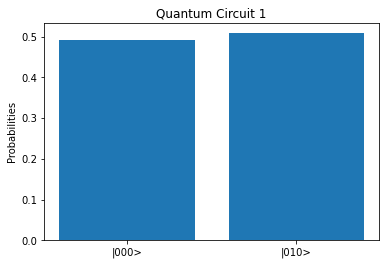

In [25]:
# Create instance
qc_1 = QuantumCircuit(3)
# Apply Hadamard gate to qubit 2
qc_1_counts = qc_1.applyHadamardGate([2]).takeMeasurements(10000)
# Plot results on bar chart
# Should expect equal outcomes of |000> and |010>
plt.title("Quantum Circuit 1")
plt.ylabel('Probabilities')
total = sum(qc_1_counts.values())
values = qc_1_counts.values()
pct_vals = [val/total for val in values]
plt.bar(qc_1_counts.keys(), pct_vals)

# Quantum Circuit 2:
|H| - Hadamard Gate<br>
|M| - Measurement<br>
<br>
|0> --|H|------------------ |M|<br>
|0> ----------|H|---------- |M|<br>
|0> ------------------|H|-- |M|<br>

<BarContainer object of 8 artists>

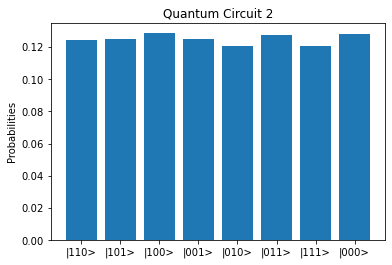

In [26]:
# Create instance
qc_2 = QuantumCircuit(3)
# Apply Hadamard gate to qubit 1
qc_2_counts = qc_2.applyHadamardGate([1,2,3]).takeMeasurements(10000)
# Plot results on bar chart
# Should expect equal outcomes of all states
plt.title("Quantum Circuit 2")
plt.ylabel('Probabilities')
total = sum(qc_2_counts.values())
values = qc_2_counts.values()
pct_vals = [val/total for val in values]
plt.bar(qc_2_counts.keys(), pct_vals)

# Quantum Circuit 3:
|H| - Hadamard Gate<br>
|M| - Measurement<br>
<br>
|0> ----------------------- |M|<br>
|0> ----------------------- |M|<br>
|0> ---|H|----------|H|--- |M|<br>

<BarContainer object of 1 artists>

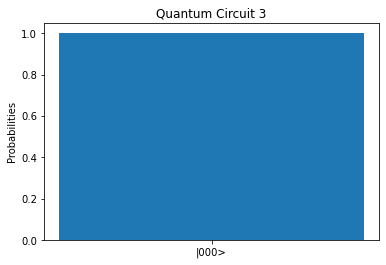

In [27]:
# Create instance
qc_3 = QuantumCircuit(3)
# Apply Hadamard gate to qubit 3
qc_3_counts = qc_3.applyHadamardGate([3,3]).takeMeasurements(10000)
# Plot results on bar chart
# Should expect |000> each time
plt.title("Quantum Circuit 3")
plt.ylabel('Probabilities')
total = sum(qc_3_counts.values())
values = qc_3_counts.values()
pct_vals = [val/total for val in values]
plt.bar(qc_3_counts.keys(), pct_vals)

# Quantum Circuit 4:
|H| - Hadamard Gate<br>
|π| - Phase Shift Gate<br>
|M| - Measurement<br>
<br>
|0> ----------------------- |M|<br>
|0> ----------------------- |M|<br>
|0> ---|H|---|π|---|H|--- |M|<br>

<BarContainer object of 1 artists>

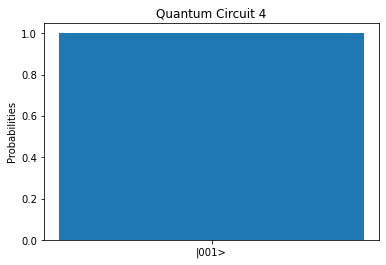

In [28]:
# Create instance
qc_4 = QuantumCircuit(3)
# Specify angle
theta = np.pi
# Apply Hadamard, phase shift, and Hadamard gates to qubit 3
qc_4_counts = qc_4.applyHadamardGate([3])\
                .applyPhaseShiftGate([3], theta)\
                .applyHadamardGate([3])\
                .takeMeasurements(10000)

# Plot results on bar chart
# Should expect |001> each time
plt.title("Quantum Circuit 4")
plt.ylabel('Probabilities')
total = sum(qc_4_counts.values())
values = qc_4_counts.values()
pct_vals = [val/total for val in values]
plt.bar(qc_4_counts.keys(), pct_vals)

# Quantum Circuit 5:
|H| - Hadamard Gate<br>
| . | - Control<br>
|U| - CNOT Gate<br>
|M| - Measurement<br>
<br>
|0> --------------------------- |M|<br>
|0> ---|H|-------| . |------- |M|<br>
|0> --------------|U|------- |M|<br>

<BarContainer object of 2 artists>

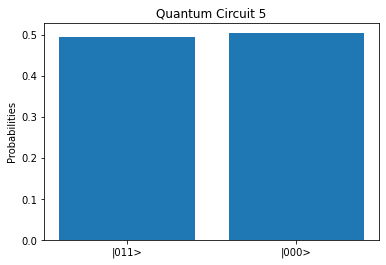

In [29]:
# Create instance of QuantumCircuit
qc_5 = QuantumCircuit()
# Apply Hadamard gate to qubit 2
# Apply controlled NOT gate, control is qubit 2, target is qubit 3
qc_5_counts = qc_5.applyHadamardGate([2])\
                    .applyCnotGate(2,3)\
                    .takeMeasurements(10000)

# Plot results on bar chart
# Should expect even probabilities of |000> and |011>
plt.title("Quantum Circuit 5")
plt.ylabel('Probabilities')
total = sum(qc_5_counts.values())
values = qc_5_counts.values()
pct_vals = [val/total for val in values]
plt.bar(qc_5_counts.keys(), pct_vals)

# Quantum Circuit 6:
|H| - Hadamard Gate<br>
| . | - Control<br>
|U| - CNOT Gate<br>
|M| - Measurement<br>
<br>
|0> -------------------------|U|--- |M|<br>
|0> ---|H|-------| . |-------| . |--- |M|<br>
|0> --------------|U|-------------- |M|<br>

<BarContainer object of 2 artists>

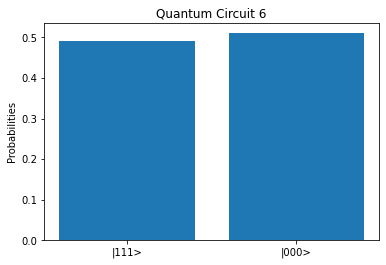

In [30]:
# Create instance of QuantumCircuit
qc_6 = QuantumCircuit()
# Apply Hadamard gate to qubit 2
# Apply controlled NOT gate, control is qubit 2, target is qubit 3
# Apply controlled NOT gate, control is qubit 2, target is qubit 1
qc_6_counts = qc_6.applyHadamardGate([2])\
                    .applyCnotGate(2,3)\
                    .applyCnotGate(2,1)\
                    .takeMeasurements(10000)

# Plot results on bar chart
# Should expect even probabilities of |000> and |111>
plt.title("Quantum Circuit 6")
plt.ylabel('Probabilities')
total = sum(qc_6_counts.values())
values = qc_6_counts.values()
pct_vals = [val/total for val in values]
plt.bar(qc_6_counts.keys(), pct_vals)

# Quantum Circuit 7:
|H| - Hadamard Gate<br>
|M| - Measurement<br>
<br>
|0> -------------------------- |M|<br>
|0> ----|H|-------|H|-------- |M|<br>
|0> -------------------------- |M|<br>

<BarContainer object of 1 artists>

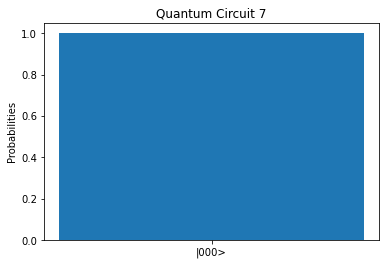

In [31]:
# Create instance of QuantumCircuit
qc_7 = QuantumCircuit()
# Apply 2 Hadamard gates to qubit 2
qc_7_counts = qc_7.applyHadamardGate([2])\
                    .applyHadamardGate([2])\
                    .takeMeasurements(10000)


# Plot results on bar chart
# Should expect |000> each time
plt.title("Quantum Circuit 7")
plt.ylabel('Probabilities')
total = sum(qc_7_counts.values())
values = qc_7_counts.values()
pct_vals = [val/total for val in values]
plt.bar(qc_7_counts.keys(), pct_vals)

# Quantum Circuit 8:
|H| - Hadamard Gate<br>
| . | - Control<br>
|U| - CNOT Gate<br>
|M| - Measurement<br>
<br>
|0> ---------------------------- |M|<br>
|0> ----|H|----| . |----|H|----- |M|<br>
|0> ------------|U|------------- |M|<br>

<BarContainer object of 4 artists>

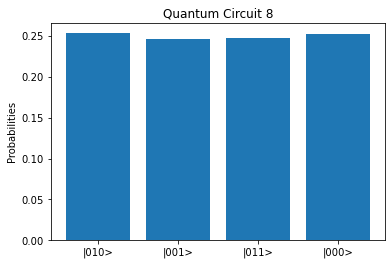

In [32]:
# Create instance of QuantumCircuit
qc_8 = QuantumCircuit()
# Apply Hadamard gate to qubit 2
# Apply controlled NOT gate, control is qubit 2, target is qubit 3
# Apply Hadamard gate to qubit 2
qc_8_counts = qc_8.applyHadamardGate([2])\
                    .applyCnotGate(2,3)\
                    .applyHadamardGate([2])\
                    .takeMeasurements(10000)


# Plot results on bar chart
# Should expect even probabilities of |000>, |001>, |010>, and |011>
plt.title("Quantum Circuit 8")
plt.ylabel('Probabilities')
total = sum(qc_8_counts.values())
values = qc_8_counts.values()
pct_vals = [val/total for val in values]
plt.bar(qc_8_counts.keys(), pct_vals)

# Grover's Algorithm
|H| - Hadamard Gate<br>
|O| - Oracle<br>
|J| - J Operator<br>
|H|-|J|-|H| - Grover Diffusion Operator<br>
|M| - Measurement<br>
<br>
Repeat Oracle and Grover Diffusion Operator block pi/4 * sqrt(2**N) times:<br>
<br>
|0> -----|H|-----|O|-----|H|-|J|-|H|----- |M|<br>
|0> -----|H|-----|O|-----|H|-|J|-|H|----- |M|<br>
|0> -----|H|-----|O|-----|H|-|J|-|H|----- |M|<br>

<BarContainer object of 8 artists>

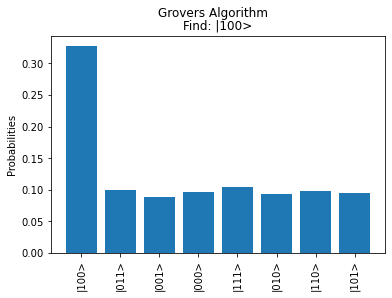

In [11]:
# Create instance of QuantumCircuit
qc_grover = QuantumCircuit()
# Oracle question
question = [1,0,0]

# Apply Grovers algorithm 
grover_counts = qc_grover.applyGroversAlgo(question)

# Plot % results on bar chart
plt.suptitle('Grovers Algorithm')
plt.title(f'Find: |{"".join([str(i) for i in question])}>')
plt.ylabel('Probabilities')
plt.xticks(rotation='vertical')
total = sum(grover_counts.values())
values = grover_counts.values()
pct_vals = [val/total for val in values]
plt.bar(grover_counts.keys(), pct_vals)

# Shor's Algorithm
|H| - Hadamard Gate<br>
|M| - Measurement<br>
| . | - Control<br>
|f(x)| - a^n (mod C) gate<br>
|π/n| - Phase shift gate<br>
x-register = l2, l1, l0<br>
f-register = m3, m2, m1, m0<br>
<br>
IQFT:
<br>
l2 |0> ---|H|-----| . |-------| . |------------------------------------ |M|<br>
l1 |0> -----------|π/2|-------|---------|H|------| . |--------------- |M|<br>
l0 |0> ----------------------|π/4|---------------|π/2|------|H|---- |M|<br>
<br>
Full circuit:
<br>
l2 |0> -|H|-------------------------| . |----------|H|----| . |------| . |---------------------------------- |M|<br>
l1 |0> -|H|--------------| . |---------|-------------------|π/2|------|---------|H|---| . |--------------- |M|<br>
l0 |0> -|H|-----| . |-------|----------|-----------------------------|π/4|------------|π/2|------|H|---- |M|<br>
m3 |0> -------|f(x)|----|f(x)|----|f(x)|----------------------------------------------------------------- |M|<br>
m2 |0> -------|f(x)|----|f(x)|----|f(x)|----------------------------------------------------------------- |M|<br>
m1 |0> -------|f(x)|----|f(x)|----|f(x)|----------------------------------------------------------------- |M|<br>
m0 |0> -------|f(x)|----|f(x)|----|f(x)|----------------------------------------------------------------- |M|<br>

In [12]:
# Composite numbers
Cs = [15, 21, 33, 35, 39, 45]
# Create instance of QuantumCircuit
qc_shor = QuantumCircuit()
# Iterate through all composite integers
for C in Cs:
    # Use Shor's algorithm to calculate factors of C
    print('Factors of ' + str(C) + ': ' + str(qc_shor.shorsAlgo(C)))

Factors of 15: [3, 5]
Factors of 21: [7, 3]
Factors of 33: [3, 11]
Factors of 35: [5, 7]
Factors of 39: [3, 13]
Factors of 45: [5, 9]


# Mermin's Quantum Device
|H| - Hadamard Gate<br>
| . | - Control<br>
|U| - CNOT Gate<br>
|R| - Rotation Gate<br>
|M| - Measurement<br>
<br>
|0> ---|H|---| . |------|R_A|---- |M|<br>
|0> ----------|U|------|R_B|---- |M|<br>

In [13]:
# Create instance of QuantumCircuit
qc_mermin = QuantumCircuit(2)
# Calculate results
results = qc_mermin.merminsDevice()

In [14]:
# Initialise dictionaries to store outcome counts
one_1_counts = dict()
one_2_counts = dict()
one_3_counts = dict()
two_1_counts = dict()
two_2_counts = dict()
two_3_counts = dict()
three_1_counts = dict()
three_2_counts = dict()
three_3_counts = dict()

# Initialise list of dictionaries
dict_list = [one_1_counts, one_2_counts, one_3_counts,
             two_1_counts, two_2_counts, two_3_counts,
             three_1_counts, three_2_counts, three_3_counts]

# Initialise list to store all possible combinations of switches
switch_combos = ['11','12','13','21','22','23','31','32','33']

# Iterate though each key in the results dictionary
for result in results.keys():
    # Get the switch values from the key
    switches = result[:2]
    # Get the index of the switch value from the switch_combos list
    idx = switch_combos.index(switches)
    # Select dictionary from dict_list and store in variable dictionary
    dictionary = dict_list[idx]
    # If the result key exists in the dictionary
    if result in dictionary:
        # Increment the value by the value of results[result]
        dictionary[result] += results[result]
    # Else if the key does not exist in the dictionary
    else:
        # Initialise the result key with a value of results[result]
        dictionary[result] = results[result]


<BarContainer object of 30 artists>

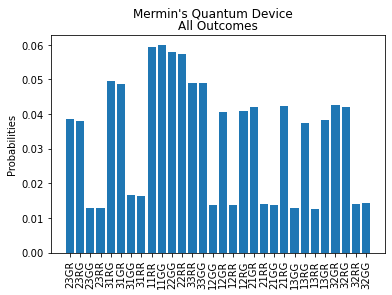

In [15]:
# Plot all results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('All Outcomes')
plt.ylabel('Probabilities')
plt.xticks(rotation='vertical')
total = sum(results.values())
values = results.values()
pct_vals = [val/total for val in values]
plt.bar(results.keys(), pct_vals)

<BarContainer object of 2 artists>

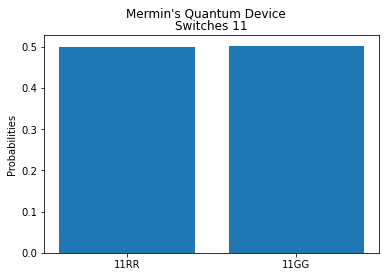

In [16]:
# Plot occurances switches '11' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 11')
plt.ylabel('Probabilities')
total = sum(one_1_counts.values())
values = one_1_counts.values()
pct_vals = [val/total for val in values]
plt.bar(one_1_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

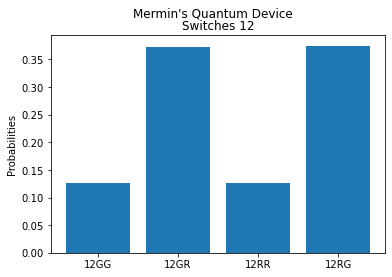

In [17]:
# Plot occurances switches '12' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 12')
plt.ylabel('Probabilities')
total = sum(one_2_counts.values())
values = one_2_counts.values()
pct_vals = [val/total for val in values]
plt.bar(one_2_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

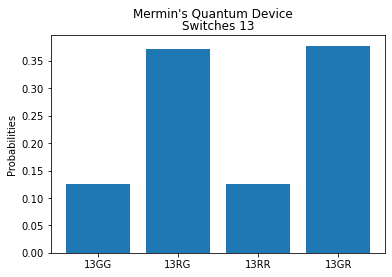

In [18]:
# Plot occurances switches '13' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 13')
plt.ylabel('Probabilities')
total = sum(one_3_counts.values())
values = one_3_counts.values()
pct_vals = [val/total for val in values]
plt.bar(one_3_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

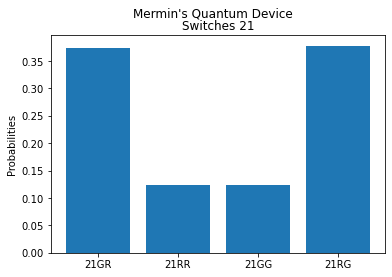

In [19]:
# Plot occurances switches '21' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 21')
plt.ylabel('Probabilities')
total = sum(two_1_counts.values())
values = two_1_counts.values()
pct_vals = [val/total for val in values]
plt.bar(two_1_counts.keys(), pct_vals)

<BarContainer object of 2 artists>

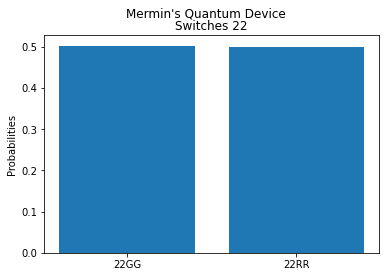

In [20]:
# Plot occurances switches '22' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 22')
plt.ylabel('Probabilities')
total = sum(two_2_counts.values())
values = two_2_counts.values()
pct_vals = [val/total for val in values]
plt.bar(two_2_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

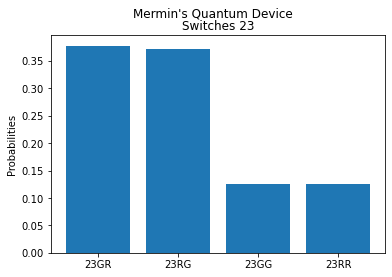

In [21]:
# Plot occurances switches '23' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 23')
plt.ylabel('Probabilities')
total = sum(two_3_counts.values())
values = two_3_counts.values()
pct_vals = [val/total for val in values]
plt.bar(two_3_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

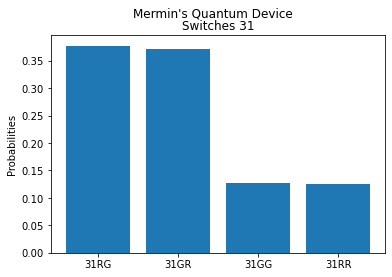

In [22]:
# Plot occurances switches '31' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 31')
plt.ylabel('Probabilities')
total = sum(three_1_counts.values())
values = three_1_counts.values()
pct_vals = [val/total for val in values]
plt.bar(three_1_counts.keys(), pct_vals)

<BarContainer object of 4 artists>

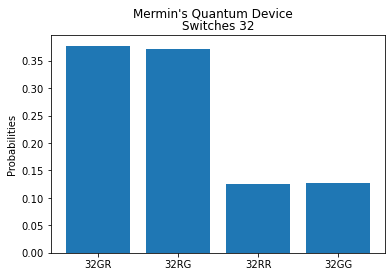

In [23]:
# Plot occurances switches '32' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 32')
plt.ylabel('Probabilities')
total = sum(three_2_counts.values())
values = three_2_counts.values()
pct_vals = [val/total for val in values]
plt.bar(three_2_counts.keys(), pct_vals)

<BarContainer object of 2 artists>

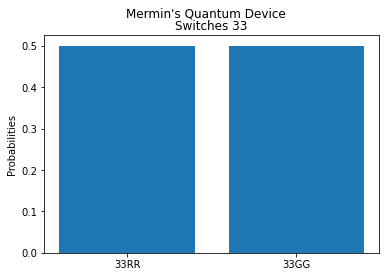

In [24]:
# Plot occurances switches '33' results on bar chart
plt.suptitle("Mermin's Quantum Device")
plt.title('Switches 33')
plt.ylabel('Probabilities')
total = sum(three_3_counts.values())
values = three_3_counts.values()
pct_vals = [val/total for val in values]
plt.bar(three_3_counts.keys(), pct_vals)